<a href="https://colab.research.google.com/github/kalyanSadhukhan/ML_LAB/blob/main/ML_EXP_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training the model...
Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8663 - loss: 0.4533 - val_accuracy: 0.9670 - val_loss: 0.1141
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9661 - loss: 0.1078 - val_accuracy: 0.9748 - val_loss: 0.0841
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9773 - loss: 0.0721 - val_accuracy: 0.9752 - val_loss: 0.0905
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9837 - loss: 0.0527 - val_accuracy: 0.9768 - val_loss: 0.0779
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9875 - loss: 0.0383 - val_accuracy: 0.9802 - val_loss: 0.0688
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9756 - loss: 0.0916

Test Accuracy: 0.9785
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


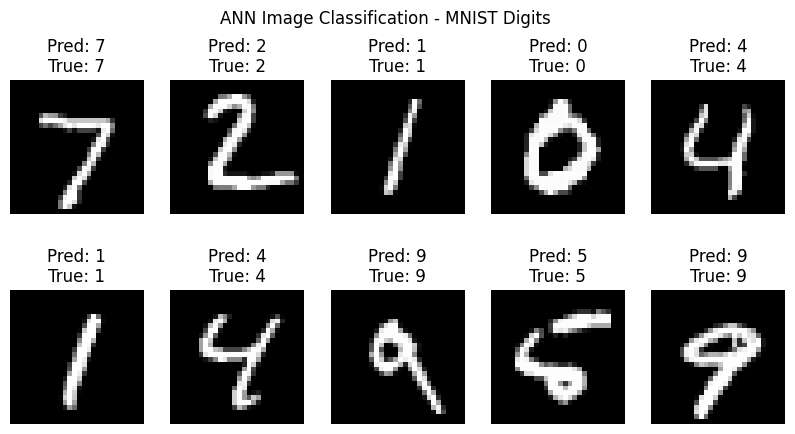

In [1]:
# --------------------------------------------------------
# Program: Image Classification using Artificial Neural Network (ANN)
# --------------------------------------------------------

# Step 1: Import required libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Load dataset (MNIST handwritten digits)
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

# Step 3: Normalize pixel values (0-255 → 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Step 4: Flatten 28x28 images into 784-dimensional vectors
x_train = x_train.reshape(len(x_train), 28 * 28)
x_test = x_test.reshape(len(x_test), 28 * 28)

# Step 5: Create ANN model
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),  # Hidden layer 1
    layers.Dense(64, activation='relu'),                      # Hidden layer 2
    layers.Dense(10, activation='softmax')                    # Output layer (10 classes)
])

# Step 6: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 7: Train the model
print("\nTraining the model...")
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# Step 8: Evaluate model performance
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Step 9: Make predictions on test data
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# Step 10: Display few test images with predictions
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}\nTrue: {y_test[i]}")
    plt.axis('off')
plt.suptitle("ANN Image Classification - MNIST Digits")
plt.show()